In [21]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.columns = map(str.lower, customer_df.columns)
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df=customer_df.rename(columns = {'effective_to_date':'datetime'})
customer_df['datetime'].dtypes
customer_df['datetime']= pd.to_datetime(customer_df['datetime'])
customer_df['datetime'].dtypes

dtype('<M8[ns]')

In [4]:
categorical = customer_df.select_dtypes(include='object')
discrete = pd.DataFrame(customer_df,columns=['customer_lifetime_value','income','monthly_premium_auto',
                       'number_of_open_complaints','number_of_policies','total_claim_amount'])
continuous = pd.DataFrame(customer_df,columns=['months_since_last_claim','months_since_policy_inception','datetime'])

In [5]:
cat = categorical.columns
x = [j for i in cat for j in categorical[i].unique()[1:]]

### ONE HOT ENCODING for categorical data

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categorical)
encoded = encoder.transform(categorical).toarray()
cat_data = pd.DataFrame(encoded , columns = x)

In [6]:
continuous['year'] = continuous['datetime'].dt.year
continuous['month'] = continuous['datetime'].dt.month
continuous['week'] = continuous['datetime'].dt.week

In [7]:
customer_final = pd.concat([discrete,continuous,cat_data], axis=1)

In [8]:
customer_final = customer_final.drop('datetime',axis=1)

Lab : Regression Model

1.Train-test split with Linear Regression

In [9]:
y = customer_final['total_claim_amount']

X = customer_final.drop('total_claim_amount',axis=1)

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Columns: 9186 entries, customer_lifetime_value to Large
dtypes: float64(9177), int64(9)
memory usage: 640.1 MB


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19698)

In [11]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [12]:
lm = linear_model.LinearRegression()

In [13]:
lm_model = lm.fit(X_train,y_train)

In [14]:
lm_predictions = lm_model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error(y_test,lm_predictions)
MSE = mean_squared_error(y_test,lm_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,lm_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is: 121.72
The mean squared error of the model in the test set is: 26052.39
The root mean squared error of the model in the test set is: 161.41
The R2 of the model in the test set is: 0.68


Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [24]:
def model_test(z):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19698)
    model = z
    model_test = model.fit(X_train,y_train)
    model_predictions = model_test.predict(X_test)
    MAE = mean_absolute_error(y_test,model_predictions)
    MSE = mean_squared_error(y_test,model_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,model_predictions)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))

In [28]:
model_test(linear_model.LinearRegression())

The mean absolute error of the model in the test set is: 121.72
The mean squared error of the model in the test set is: 26052.39
The root mean squared error of the model in the test set is: 161.41
The R2 of the model in the test set is: 0.68


In [30]:
from sklearn.neighbors import KNeighborsRegressor

model_test(KNeighborsRegressor(n_neighbors=2))

The mean absolute error of the model in the test set is: 174.72
The mean squared error of the model in the test set is: 66726.84
The root mean squared error of the model in the test set is: 258.32
The R2 of the model in the test set is: 0.17


In [31]:
model_test(KNeighborsRegressor(n_neighbors=3))

The mean absolute error of the model in the test set is: 168.40
The mean squared error of the model in the test set is: 62065.64
The root mean squared error of the model in the test set is: 249.13
The R2 of the model in the test set is: 0.23


In [51]:
def kneighbors_test(z):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19698)
    km = KNeighborsRegressor(n_neighbors=z)
    km_model = km.fit(X_train,y_train)
    km_predictions = km_model.predict(X_test)
    km_scores= scores.append(model.score(X_test, y_test))
    MAE = mean_absolute_error(y_test,km_predictions)
    MSE = mean_squared_error(y_test,km_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,km_predictions)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))

In [42]:
kneighbors_test(2)

The mean absolute error of the model in the test set is: 174.72
The mean squared error of the model in the test set is: 66726.84
The root mean squared error of the model in the test set is: 258.32
The R2 of the model in the test set is: 0.17


In [43]:
kneighbors_test(3)

The mean absolute error of the model in the test set is: 168.40
The mean squared error of the model in the test set is: 62065.64
The root mean squared error of the model in the test set is: 249.13
The R2 of the model in the test set is: 0.23


In [44]:
kneighbors_test(4)

The mean absolute error of the model in the test set is: 166.13
The mean squared error of the model in the test set is: 59823.17
The root mean squared error of the model in the test set is: 244.59
The R2 of the model in the test set is: 0.26


In [45]:
kneighbors_test(5)

The mean absolute error of the model in the test set is: 167.15
The mean squared error of the model in the test set is: 58967.42
The root mean squared error of the model in the test set is: 242.83
The R2 of the model in the test set is: 0.27


In [46]:
kneighbors_test(6)

The mean absolute error of the model in the test set is: 167.31
The mean squared error of the model in the test set is: 58122.67
The root mean squared error of the model in the test set is: 241.09
The R2 of the model in the test set is: 0.28


In [47]:
for i in range(2,10):
    kneighbors_test(i)

The mean absolute error of the model in the test set is: 174.72
The mean squared error of the model in the test set is: 66726.84
The root mean squared error of the model in the test set is: 258.32
The R2 of the model in the test set is: 0.17
The mean absolute error of the model in the test set is: 168.40
The mean squared error of the model in the test set is: 62065.64
The root mean squared error of the model in the test set is: 249.13
The R2 of the model in the test set is: 0.23
The mean absolute error of the model in the test set is: 166.13
The mean squared error of the model in the test set is: 59823.17
The root mean squared error of the model in the test set is: 244.59
The R2 of the model in the test set is: 0.26
The mean absolute error of the model in the test set is: 167.15
The mean squared error of the model in the test set is: 58967.42
The root mean squared error of the model in the test set is: 242.83
The R2 of the model in the test set is: 0.27
The mean absolute error of the m

In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

model_test(MLPRegressor(random_state=1,max_iter=500))

The mean absolute error of the model in the test set is: 120.65
The mean squared error of the model in the test set is: 30722.06
The root mean squared error of the model in the test set is: 175.28
The R2 of the model in the test set is: 0.62


In [57]:
def model_test(z):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19698)
    mplr = z
    mplr_model = mplr.fit(X_train,y_train)
    mplr_predictions = mplr_model.predict(X_test)
    mplr_score =mplr.score(X_test, y_test)
    MAE = mean_absolute_error(y_test,mplr_predictions)
    MSE = mean_squared_error(y_test,mplr_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,mplr_predictions)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))

In [58]:
model_test(MLPRegressor(random_state=1,max_iter=500))

The mean absolute error of the model in the test set is: 120.65
The mean squared error of the model in the test set is: 30722.06
The root mean squared error of the model in the test set is: 175.28
The R2 of the model in the test set is: 0.62


Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [30]:
numeric = customer_df.select_dtypes(np.number)
numeric

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                             0                   1          384.811147  
1                             0                   8         1131.464935  
2                             0                   2          566.472247  
3                             0                   7          529.881344  
4                             0                   1          138.130879  
...                         ...                 ...                 ...  
9129                          0                   2          198.234764  
9130                          0                   1          379.200000  
9131                          3                   2          790.784983  
9132                          0                   3          691.200000  
9133                          0                   1          369.600000  

[9134 rows x 8 columns]

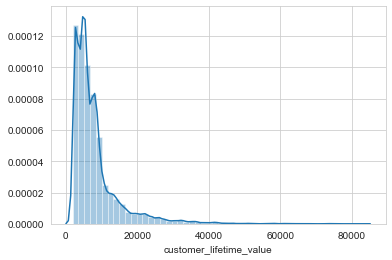

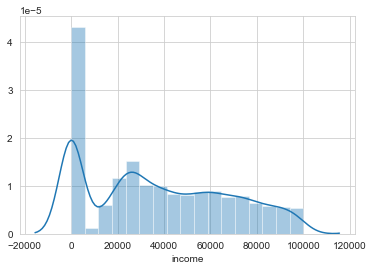

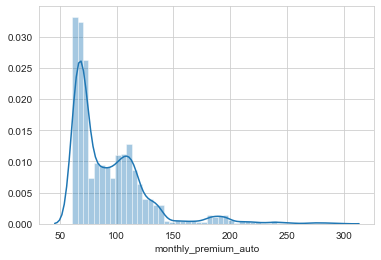

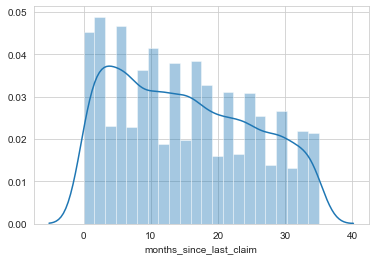

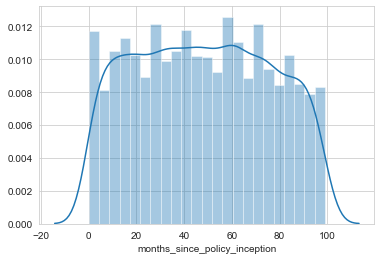

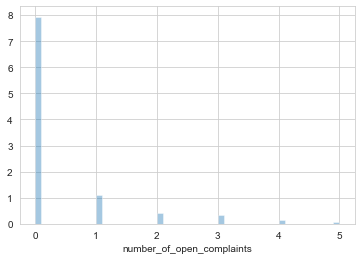

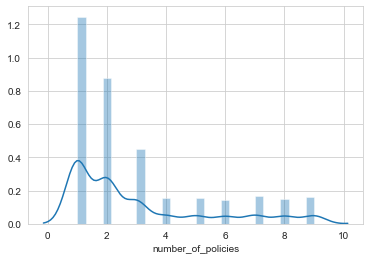

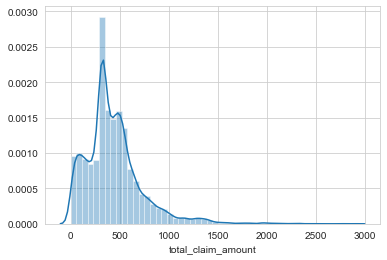

In [36]:
for i in list(numeric):
    sns.distplot(numeric[i])
    plt.show()
    
## There are no normal distribution shape on the graphs bellow.
## Nevertheless, it seems there are exponential/lognormal, such as customer lifetime value, monthly premium auto
## number of policies and total claim amount.


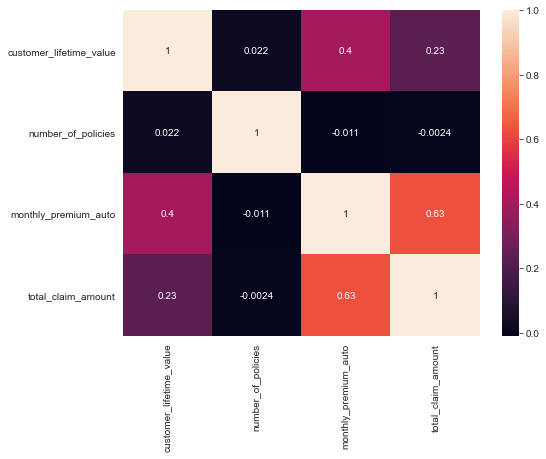

In [67]:
numericals_to_transform = customer_final[['customer_lifetime_value','number_of_policies','monthly_premium_auto','total_claim_amount']]

corr_matrix=numericals_to_transform.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [62]:
log_numeric=numeric[['customer_lifetime_value','monthly_premium_auto','total_claim_amount']]

Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [63]:
log_transform = np.log(log_numeric)

log_transform

customer_lifetime_value  monthly_premium_auto  total_claim_amount
0                    7.924260              4.234107            5.952753
1                    8.850738              4.543295            7.031268
2                    9.464008              4.682131            6.339428
3                    8.941920              4.663439            6.272653
4                    7.942253              4.290459            4.928202
...                       ...                   ...                 ...
9129                10.060747              4.290459            5.289452
9130                 8.038031              4.369448            5.938064
9131                 9.007476              4.442651            6.673026
9132                 8.925912              4.564348            6.538429
9133                 7.867809              4.343805            5.912421

[9134 rows x 3 columns]

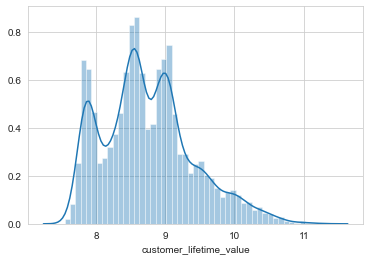

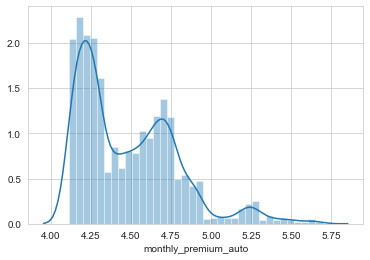

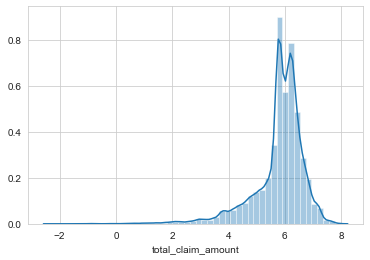

In [64]:
for i in list(log_transform):
    sns.distplot(log_transform[i])
    plt.show()

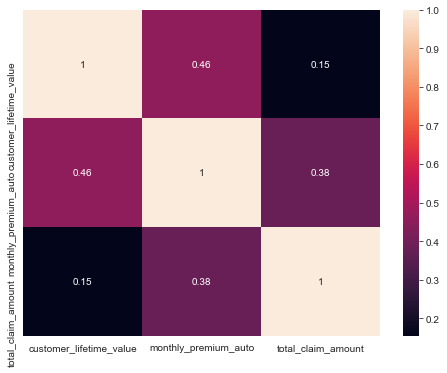

In [65]:
corr_matrix=log_transform.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [69]:
customer_finals = customer_final.drop('customer_lifetime_value',axis=1)

In [70]:
customer_finals = customer_final.drop('monthly_premium_auto',axis=1)

In [71]:
customer_finals = customer_final.drop('total_claim_amount',axis=1)

In [72]:
final_test = pd.concat([customer_finals,log_transform],axis=1)

In [73]:
final_test

customer_lifetime_value  income  monthly_premium_auto  \
0                 2763.519279   56274                    69   
1                 6979.535903       0                    94   
2                12887.431650   48767                   108   
3                 7645.861827       0                   106   
4                 2813.692575   43836                    73   
...                       ...     ...                   ...   
9129             23405.987980   71941                    73   
9130              3096.511217   21604                    79   
9131              8163.890428       0                    85   
9132              7524.442436   21941                    96   
9133              2611.836866       0                    77   

      number_of_open_complaints  number_of_policies  months_since_last_claim  \
0                             0                   1                       32   
1                             0                   8                       13   
2                             0                   2                       18   
3                             0                   7                       18   
4                             0                   1                       12   
...                         ...                 ...                      ...   
9129                          0                   2                       18   
9130                          0                   1                       14   
9131                          3                   2                        9   
9132                          0                   3                       34   
9133                          0                   1                        3   

      months_since_policy_inception  year  month  week  QZ44356  AI49188  \
0                                 5  2011      2     8      0.0      0.0   
1                                42  2011      1     5      0.0      0.0   
2                                38  2011      2     7      0.0      0.0   
3                                65  2011      1     3      0.0      0.0   
4                                44  2011      2     5      0.0      0.0   
...                             ...   ...    ...   ...      ...      ...   
9129                             89  2011      2     6      0.0      0.0   
9130                             28  2011      2     6      0.0      0.0   
9131                             37  2011      2     5      0.0      0.0   
9132                              3  2011      2     5      0.0      0.0   
9133                             90  2011      2     7      0.0      0.0   

      WW63253  HB64268  OC83172  XZ87318  CF85061  DY87989  BQ94931  SX51350  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
9129      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9130      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9131      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9132      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
9133      0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

      VQ65197  DP39365  SJ95423  IL66569  BW63560  FV94802  OE15005  WC83389  \
0         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
3         0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
4         0.0 

In [76]:
## Train test split:

def model_test(z):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19698)
    model = z
    model_test = model.fit(X_train,y_train)
    model_predictions = model_test.predict(X_test)
    MAE = mean_absolute_error(y_test,model_predictions)
    MSE = mean_squared_error(y_test,model_predictions)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test,model_predictions)
    print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
    print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
    print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
    print("The R2 of the model in the test set is: %4.2f" % (R2))

In [77]:
y = final_test['total_claim_amount']

X = final_test.drop('total_claim_amount',axis=1)

In [78]:
model_test(linear_model.LinearRegression())

The mean absolute error of the model in the test set is:   0.28
The mean squared error of the model in the test set is:   0.24
The root mean squared error of the model in the test set is:   0.49
The R2 of the model in the test set is: 0.71


In [80]:
## Normalizing (best option)

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(numeric)
numeric_norm = pd.DataFrame(transformer.transform(numeric), columns=numeric.columns)
numeric_norm.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.049048  0.998772              0.001225   
1                 0.987006  0.000000              0.013293   
2                 0.255478  0.966747              0.002141   
3                 0.997473  0.000000              0.013829   
4                 0.064055  0.997940              0.001662   

   months_since_last_claim  months_since_policy_inception  \
0                 0.000568                       0.000089   
1                 0.001838                       0.005939   
2                 0.000357                       0.000753   
3                 0.002348                       0.008480   
4                 0.000273                       0.001002   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                        0.0            0.000018            0.006830  
1                        0.0            0.001131            0.160005  
2                        0.0            0.000040            0.011230  
3                        0.0            0.000913            0.069128  
4                        0.0            0.000023            0.003145

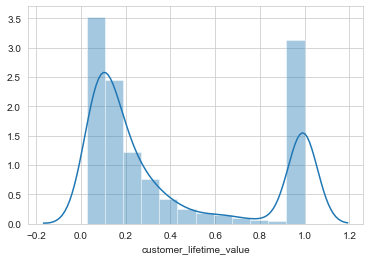

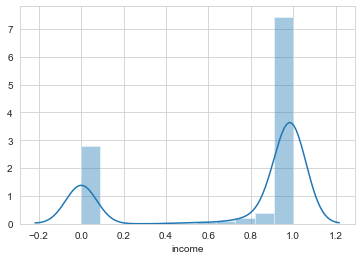

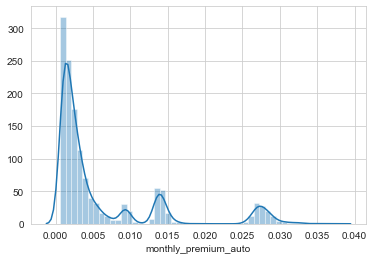

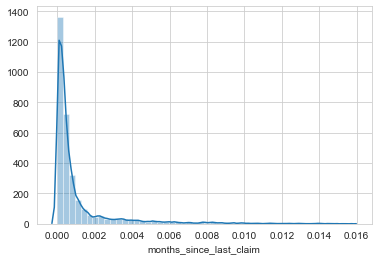

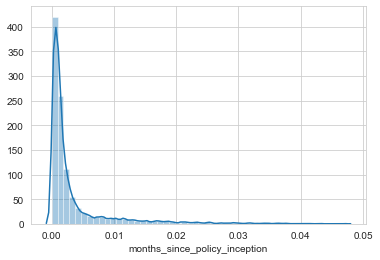

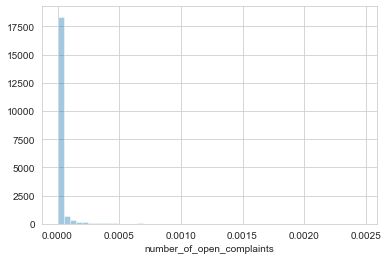

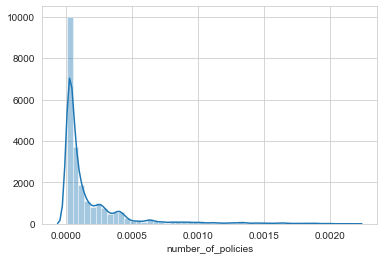

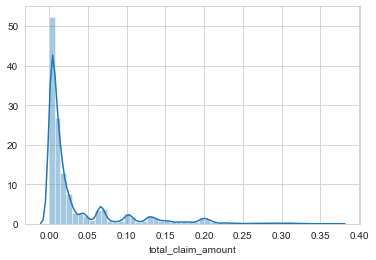

In [81]:
for i in list(numeric_norm):
    sns.distplot(numeric_norm[i])
    plt.show()

In [82]:
## Standard scaler (no good)

from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(numeric)
numeric_stsc = pd.DataFrame(transformer.transform(numeric), columns=numeric.columns)
numeric_stsc.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                -0.762878  0.612827             -0.703925   
1                -0.149245 -1.239617              0.022691   
2                 0.710636  0.365710              0.429596   
3                -0.052263 -1.239617              0.371467   
4                -0.755575  0.203390             -0.587666   

   months_since_last_claim  months_since_policy_inception  \
0                 1.678099                      -1.543287   
1                -0.208186                      -0.217334   
2                 0.288205                      -0.360680   
3                 0.288205                       0.606907   
4                -0.307465                      -0.145661   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                   -0.42225           -0.822648           -0.169640  
1                   -0.42225            2.106160            2.400737  
2                   -0.42225           -0.404247            0.455734  
3                   -0.42225            1.687759            0.329769  
4                   -0.42225           -0.822648           -1.018843

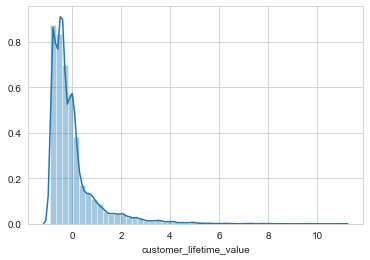

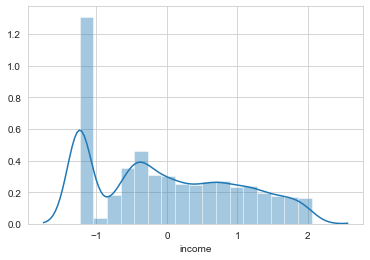

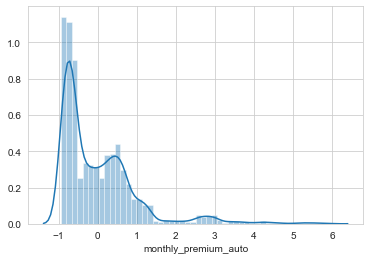

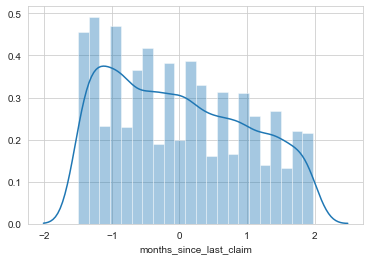

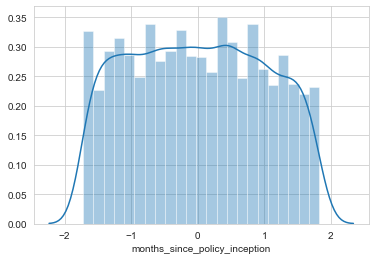

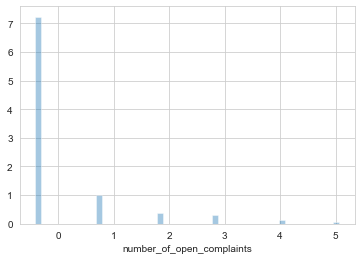

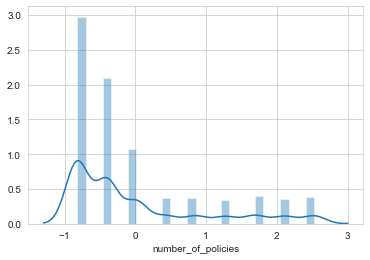

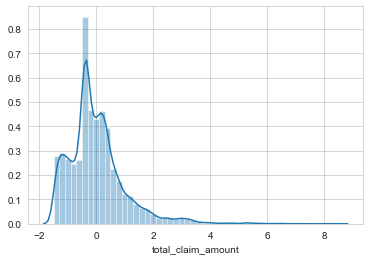

In [83]:
for i in list(numeric_stsc):
    sns.distplot(numeric_stsc[i])
    plt.show()

In [84]:
## MINMAXSCALER

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(numeric)
numeric_minmax = pd.DataFrame(scaler.transform(numeric), columns=numeric.columns)
numeric_minmax.head()

customer_lifetime_value    income  monthly_premium_auto  \
0                 0.010629  0.562847              0.033755   
1                 0.062406  0.000000              0.139241   
2                 0.134960  0.487763              0.198312   
3                 0.070589  0.000000              0.189873   
4                 0.011245  0.438443              0.050633   

   months_since_last_claim  months_since_policy_inception  \
0                 0.914286                       0.050505   
1                 0.371429                       0.424242   
2                 0.514286                       0.383838   
3                 0.514286                       0.656566   
4                 0.342857                       0.444444   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                        0.0               0.000            0.132974  
1                        0.0               0.875            0.391051  
2                        0.0               0.125            0.195764  
3                        0.0               0.750            0.183117  
4                        0.0               0.000            0.047710

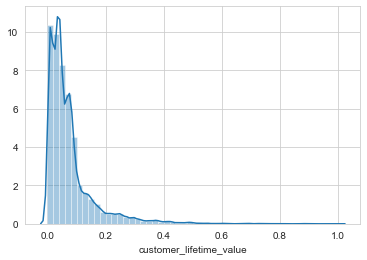

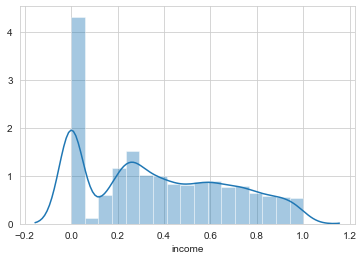

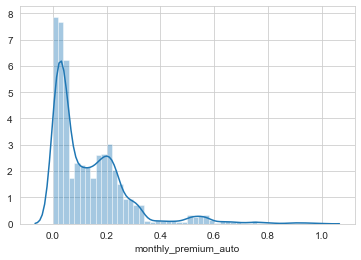

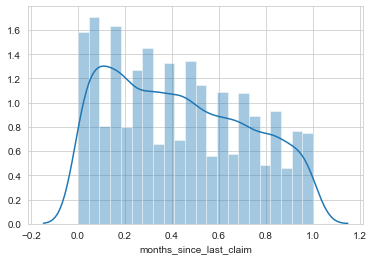

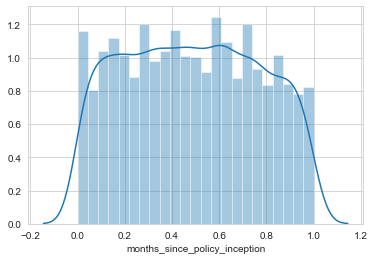

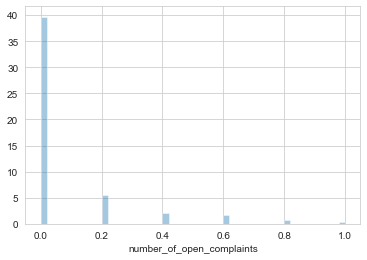

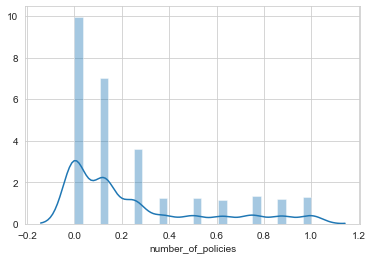

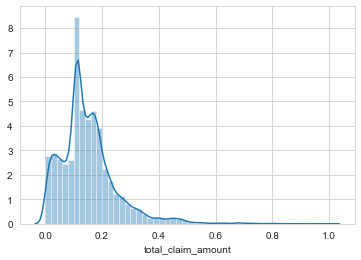

In [85]:
for i in list(numeric_minmax):
    sns.distplot(numeric_minmax[i])
    plt.show()

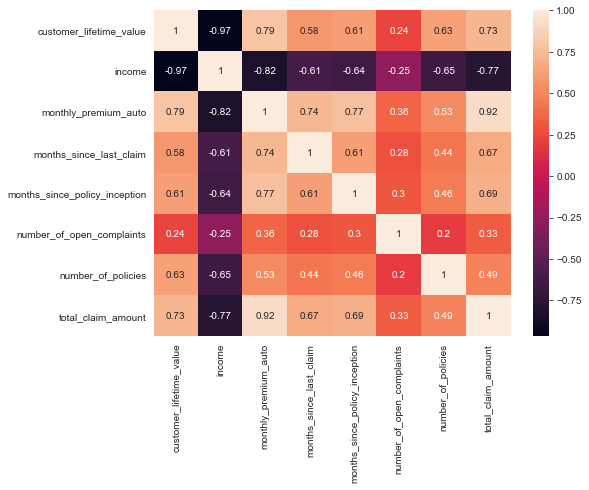

In [86]:
corr_matrix=numeric_norm.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [87]:
norm_log_transform = np.log(numeric_norm)

norm_log_transform

customer_lifetime_value    income  monthly_premium_auto  \
0                   -3.014956 -0.001229             -6.705110   
1                   -0.013079      -inf             -4.320522   
2                   -1.364620 -0.033818             -6.146496   
3                   -0.002530      -inf             -4.281011   
4                   -2.748020 -0.002063             -6.399814   
...                       ...       ...                   ...   
9129                -1.173167 -0.050313             -6.943455   
9130                -1.952929 -0.010326             -5.621512   
9131                -0.004734      -inf             -4.569559   
9132                -1.126249 -0.056049             -5.487813   
9133                -0.010921      -inf             -3.534925   

      months_since_last_claim  months_since_policy_inception  \
0                   -7.473481                      -9.329779   
1                   -6.298867                      -5.126147   
2                   -7.938256                      -7.191041   
3                   -6.054079                      -4.770063   
4                   -8.205367                      -6.906084   
...                       ...                            ...   
9129                -8.343543                      -6.745278   
9130                -7.351903                      -6.658755   
9131                -6.814986                      -5.401292   
9132                -6.525800                      -8.953549   
9133                -6.780118                      -3.378921   

      number_of_open_complaints  number_of_policies  total_claim_amount  
0                          -inf          -10.939216           -4.986464  
1                          -inf           -6.784375           -1.832548  
2                          -inf          -10.135480           -4.489200  
3                          -inf           -6.998540           -2.671797  
4                          -inf          -10.690273           -5.762072  
...                         ...                 ...                 ...  
9129                       -inf          -10.540767           -5.944462  
9130                       -inf           -9.990960           -4.052896  
9131                  -7.913598           -8.319063           -2.339184  
9132                       -inf           -8.953549           -3.513732  
9133                       -inf           -7.878730           -1.966309  

[9134 rows x 8 columns]

In [93]:
logt_numeric=norm_log_transform[['customer_lifetime_value','monthly_premium_auto','number_of_policies','total_claim_amount']]

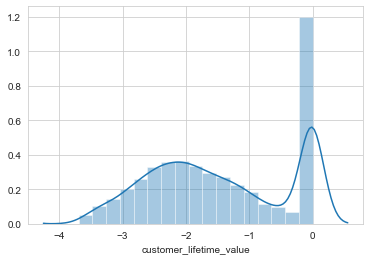

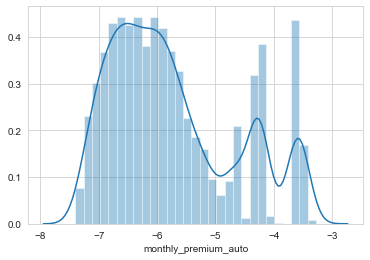

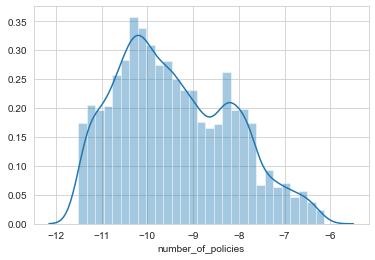

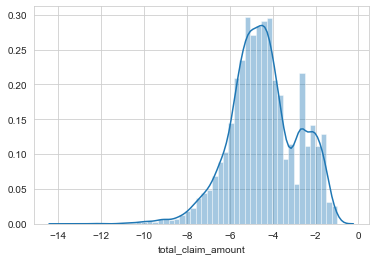

In [94]:
for i in list(logt_numeric):
    sns.distplot(logt_numeric[i])
    plt.show()

In [96]:
final_testing = final_test.drop('customer_lifetime_value',axis=1)

In [97]:
final_testing = final_test.drop('monthly_premium_auto',axis=1)

In [98]:
final_testing = final_test.drop('total_claim_amount',axis=1)

In [101]:
final_testing = pd.concat([final_test,logt_numeric],axis=1)

In [102]:
y = final_testing['total_claim_amount']

X = final_testing.drop('total_claim_amount',axis=1)

In [103]:
model_test(linear_model.LinearRegression())

The mean absolute error of the model in the test set is:   0.28
The mean squared error of the model in the test set is:   0.24
The root mean squared error of the model in the test set is:   0.49
The R2 of the model in the test set is: 0.81


In [104]:
## Normalized 3 variables (2 independent and 1 dependent) and then log-transformed them and tested in linear model

In [105]:
## Used Linear Regression model since it was the one with best performance before doing these transformations